In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import lsqr


In [2]:
data = scipy.io.loadmat('Y1 Y2 Y3 and A1 A2 A3.mat')
A1 = data['A1']
A2 = data['A2']
A3 = data['A3']
Y1 = data['y1']
Y2 = data['y2']
Y3 = data['y3']

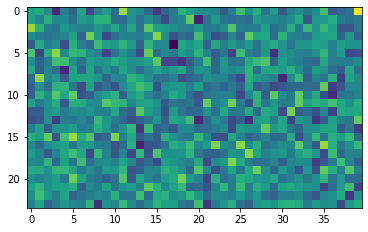

In [3]:
y1_fig = Y1.reshape((40,24))
plt.imshow(y1_fig.T)

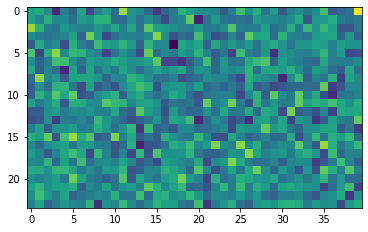

In [4]:
y2_fig = Y2.reshape((48,30))
plt.imshow(y1_fig.T)

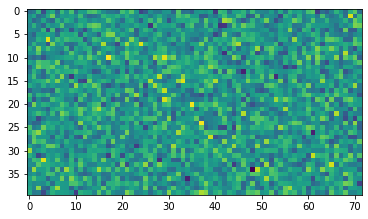

In [5]:
y3_fig = Y3.reshape((72,40))
plt.imshow(y3_fig.T)

In [7]:
def OMP(A, y, s, noise, n_norm):
    N = A.shape[1]
    M = A.shape[0]
    k = []                           
    a = np.empty((M, 0))  
    r = y                            

    while max(np.abs(A.T @ r)) > 0.1:
        x_omp = np.zeros((N, 1))
        j = np.argmax(np.abs(A.T @ r))
        k.append(j)

        a = np.hstack([a, A[:, j].reshape(M, 1)])

        a_temp = np.linalg.inv(a.T @ a)
        alpha = a_temp @ a.T @ y
        b = a @ alpha
        r = y - b

        for i in range(len(k)):
            x_omp[k[i], 0] = alpha[i]
        error = np.linalg.norm(y - A @ x_omp)

        if noise:
            if error < n_norm or len(k) == s:
                break
        else:
            if error < 1e-3:
                break

    for i in range(len(k)):
        x_omp[k[i], 0] = alpha[i]

    return x_omp, len(k)


Iteration for X1 stopped at 840


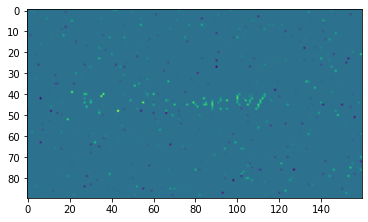

In [8]:
X1_OMP, X1_OMP_INDEX = OMP(A1, Y1, 0, True, 0)
print("Iteration for X1 stopped at", X1_OMP_INDEX)
x1_fig = X1_OMP.reshape((160,90))
plt.imshow(x1_fig.T)

Iteration for X2 stopped at 374


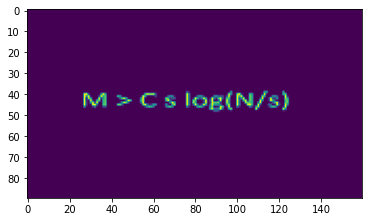

In [9]:
X2_OMP, X2_OMP_INDEX = OMP(A2, Y2, 0, True, 0)
print("Iteration for X2 stopped at", X2_OMP_INDEX)
x2_fig = X2_OMP.reshape((160,90))
plt.imshow(x2_fig.T)

Iteration for X3 stopped at 357


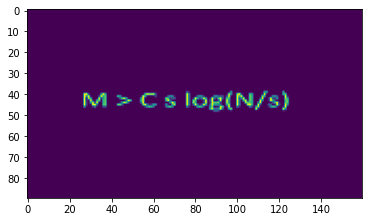

In [10]:
X3_OMP, X3_OMP_INDEX = OMP(A3, Y3, 0, True, 0)
print("Iteration for X3 stopped at", X3_OMP_INDEX)
x3_fig = X3_OMP.reshape((160,90))
plt.imshow(x3_fig.T)

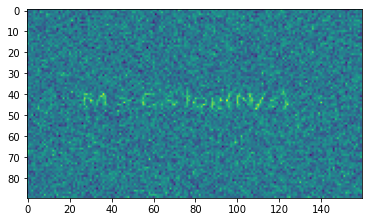

In [11]:
X1_LSQR = lsqr(A1, Y1)[0]
x1_lsqr_fig = X1_LSQR.reshape(160, 90)
plt.imshow(x1_lsqr_fig.T) 

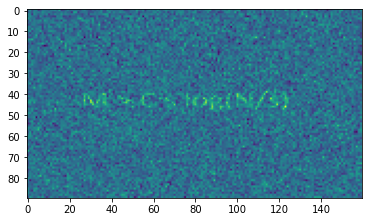

In [12]:
X2_LSQR = lsqr(A2, Y2)[0]
x2_lsqr_fig = X2_LSQR.reshape(160, 90)
plt.imshow(x2_lsqr_fig.T) 

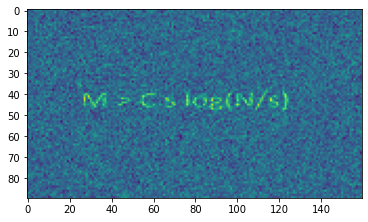

In [13]:
X3_LSQR = lsqr(A3, Y3)[0]
x3_lsqr_fig = X3_LSQR.reshape(160, 90)
plt.imshow(x3_lsqr_fig.T) 